In [1]:
from spec_extract import *
from astropy.table import Table
import pandas as pd
from glob import glob
from spec_tools import Source_present
from grizli import multifit
import matplotlib.pyplot as plt
import seaborn as sea
from astropy.io import fits

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

if hpath == '/Users/Vince.ec/':
    dpath = '/Volumes/Vince_research/Data/' 
    
else:
    dpath = hpath + 'Data/' 


In [2]:
grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/*GrismFLT.fits'),cpu_count=8)


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/ib3720f0q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/ib3720f4q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/ib3720fgq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/ib3720fkq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icat20tdq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icat20tpq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icat20tiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icat20tuq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt46swq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt46sxq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt46t0q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt46t2q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt47xbq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt47xcq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt47xfq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt47xhq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt48mgq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt48mhq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt48mnq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt48mtq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt49hmq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt49hnq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt49hqq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt49hsq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt50hvq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt50hwq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt50hzq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/RELEASE_v2.1.0/Grism_flts/GN1/icxt50i1q.01.GrismFL

In [3]:
Cpd = pd.read_pickle('../dataframes/fitdb/tabfitdb.pkl')
Cids = Cpd.query('field == "GSD"').id.values

In [4]:

for i in Cids:
    try:
        print(grp.get_beams(i),i)
    except:
        pass

[] 18642
[] 19148
[] 26139
[] 32799
[] 35774
[] 38191
[] 39170
[] 39241
[] 39631
[] 39804
[] 39805
[] 39850
[] 40476
[] 40597
[] 40623
[] 40862
[] 41148
[] 41520
[] 42221
[] 43615
[] 44042
[] 44620
[] 44946
[] 45775
[] 45789
[] 45972
[] 47223
[] 47677
[] 47691
[] 48631
[] 19872
[] 23237
[] 25799
[] 26018
[] 26272
[] 28119
[] 29257
[] 29794
[] 30566
[] 30587
[] 34671
[] 35640
[] 35993
[] 36095
[<grizli.model.BeamCutout object at 0x1a2760f9b0>, <grizli.model.BeamCutout object at 0x1a27546978>, <grizli.model.BeamCutout object at 0x1a276a4b70>, <grizli.model.BeamCutout object at 0x1a276b8f60>, <grizli.model.BeamCutout object at 0x1a276cdda0>, <grizli.model.BeamCutout object at 0x1a276e2be0>, <grizli.model.BeamCutout object at 0x1a276f4b70>, <grizli.model.BeamCutout object at 0x1a27707fd0>, <grizli.model.BeamCutout object at 0x1a27780ba8>, <grizli.model.BeamCutout object at 0x1a27794da0>, <grizli.model.BeamCutout object at 0x1a277aabe0>, <grizli.model.BeamCutout object at 0x1a277bad68>, <gr

In [5]:
beams = grp.get_beams(38173)

In [8]:

for i in beams:
    print(i.grism.filter)

G141
G141
G141
G141
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102
G102


In [2]:
gsd_cat = pd.read_pickle('../dataframes/galaxy_frames/GS_snr.pkl')
gnd_cat = pd.read_pickle('../dataframes/galaxy_frames/GN_snr.pkl')

In [2]:
gsd_fields = ['ERSPRIME', 'GS1', 'GS2', 'GS3', 'GS4', 'GS5']
gnd_fields = ['GN1', 'GN2', 'GN3', 'GN4', 'GN5', 'GN7']

In [3]:
field = 'GSD'
Cpd = pd.read_pickle('../dataframes/galaxy_frames/GS_new.pkl')
Cids = Cpd.id.values

skipped = []
for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/Data/Grism_fields/{0}/*GrismFLT.fits'.format(gsd_fields[i])))
    for ii in Cids:
        try:
            ex = Extract_all(ii, 'GSD', grp)
            ex.Extract_BeamCutout()
        except:
            print(ii)

Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt21b8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt21bcq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt21beq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Da

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/ibhj01j4q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/ibhj01iqq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/ibhj01ixq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/ibhj01jbq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt07dxq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt07dzq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt07e2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt07e4q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt08e7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt08e9q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt08ecq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt08eeq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt09f0q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt09f2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt09f5q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt09f7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt10dbq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS1/icxt10deq.01.GrismFLT.fits!
Load /Volume

In [4]:
field = 'GND'
Cpd = pd.read_pickle('../dataframes/galaxy_frames/GN_new.pkl')
Cids = Cpd.id.values
skipped = []
for i in range(len(gnd_fields)):
    grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/Data/Grism_fields/{0}/*GrismFLT.fits'.format(gnd_fields[i])))
    for ii in Cids:
        try:
            ex = Extract_all(ii, 'GND', grp)
            ex.Extract_BeamCutout()
        except:
            print(ii)

Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/ib3720f4q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/ib3720fkq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/ib3720f0q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/ib3720fgq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icat20tdq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icat20tiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icat20tpq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icat20tuq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt46swq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt46sxq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt46t0q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt46t2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt47xbq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt47xcq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt47xfq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt47xhq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt48mgq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN1/icxt48mhq.01.GrismFLT.fits!
Load /Volume

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708ipq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708i5q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712lkq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712lyq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712maq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712meq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721xiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721xmq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721xyq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721y2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3725dyq.01.GrismFLT.fits!
Load /Volume

In [ ]:
/Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/

In [4]:
grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/Data/Grism_fields/{0}/*GrismFLT.fits'.format(gnd_fields[1])))


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708i5q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3708ipq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712lkq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712lyq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712maq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3712meq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721xiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721xmq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721xyq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3721y2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3725dyq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3725e2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3725eeq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3725eiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3748v8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/ib3748vdq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/icat08hiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/icat08hnq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GN2/icat08huq.01.GrismFLT.fits!
Load /Volume

In [15]:
for ii in gnd_cat.index:
    try:
        ex = Extract_all(gnd_cat.id[ii], 'GND', grp)
        ex.Extract_BeamCutout()
    except:
        print(gnd_cat.id[ii])
        
    print(grp.get_beams(gnd_cat.id[ii]))


[]
[<grizli.model.BeamCutout object at 0x1a5d5059b0>, <grizli.model.BeamCutout object at 0x1a5d505be0>, <grizli.model.BeamCutout object at 0x1a793257b8>, <grizli.model.BeamCutout object at 0x1a5d516208>, <grizli.model.BeamCutout object at 0x1a5d51cac8>, <grizli.model.BeamCutout object at 0x1a5d50eeb8>, <grizli.model.BeamCutout object at 0x1abdeea860>, <grizli.model.BeamCutout object at 0x1a848b1da0>]
[]
[]


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


[<grizli.model.BeamCutout object at 0x1a5d524748>, <grizli.model.BeamCutout object at 0x1a79320048>, <grizli.model.BeamCutout object at 0x1a79325978>, <grizli.model.BeamCutout object at 0x1a5d5244e0>, <grizli.model.BeamCutout object at 0x1a5d505390>, <grizli.model.BeamCutout object at 0x1a5d51da58>, <grizli.model.BeamCutout object at 0x1abdef0080>, <grizli.model.BeamCutout object at 0x1a5d510080>, <grizli.model.BeamCutout object at 0x1a848842e8>, <grizli.model.BeamCutout object at 0x1a8489c9e8>]
[<grizli.model.BeamCutout object at 0x1a5d4f1da0>, <grizli.model.BeamCutout object at 0x1a5d4f1c50>, <grizli.model.BeamCutout object at 0x1a5d523f98>, <grizli.model.BeamCutout object at 0x1a5d4f9978>, <grizli.model.BeamCutout object at 0x1a793200b8>, <grizli.model.BeamCutout object at 0x1a5d4f8dd8>, <grizli.model.BeamCutout object at 0x1a5d4f4e48>, <grizli.model.BeamCutout object at 0x1abdee1780>]
[<grizli.model.BeamCutout object at 0x1a6c466978>, <grizli.model.BeamCutout object at 0x1a792e7d68

In [16]:
gnd_cat.index

Int64Index([ 2,  6,  7,  9, 13, 14, 16, 18, 22, 23, 24, 25, 30, 31, 33, 34, 36,
            37, 39, 40, 41, 45, 46, 48, 49, 52, 53, 54, 55, 56, 57, 62, 63, 64,
            65, 66, 67, 68, 69, 70, 74, 75, 76, 80, 81, 82, 83, 85, 86, 87, 89,
            90, 92, 93, 95, 96],
           dtype='int64')

In [5]:
ex = Extract_all(gnd_cat.id[6], 'GND', grp)
ex.Extract_BeamCutout()

remove 18333_2
remove 21516_2

(-1e-18, 2e-18)

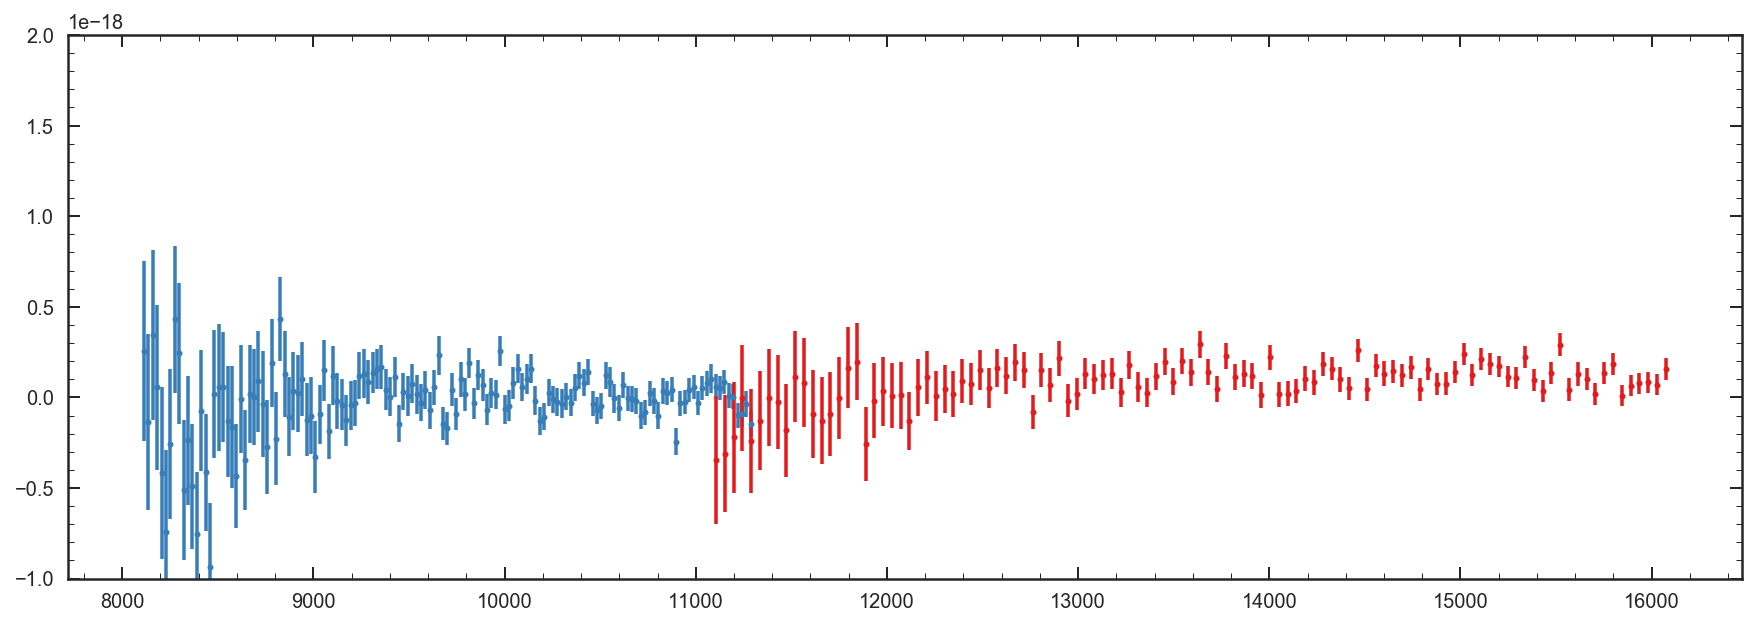

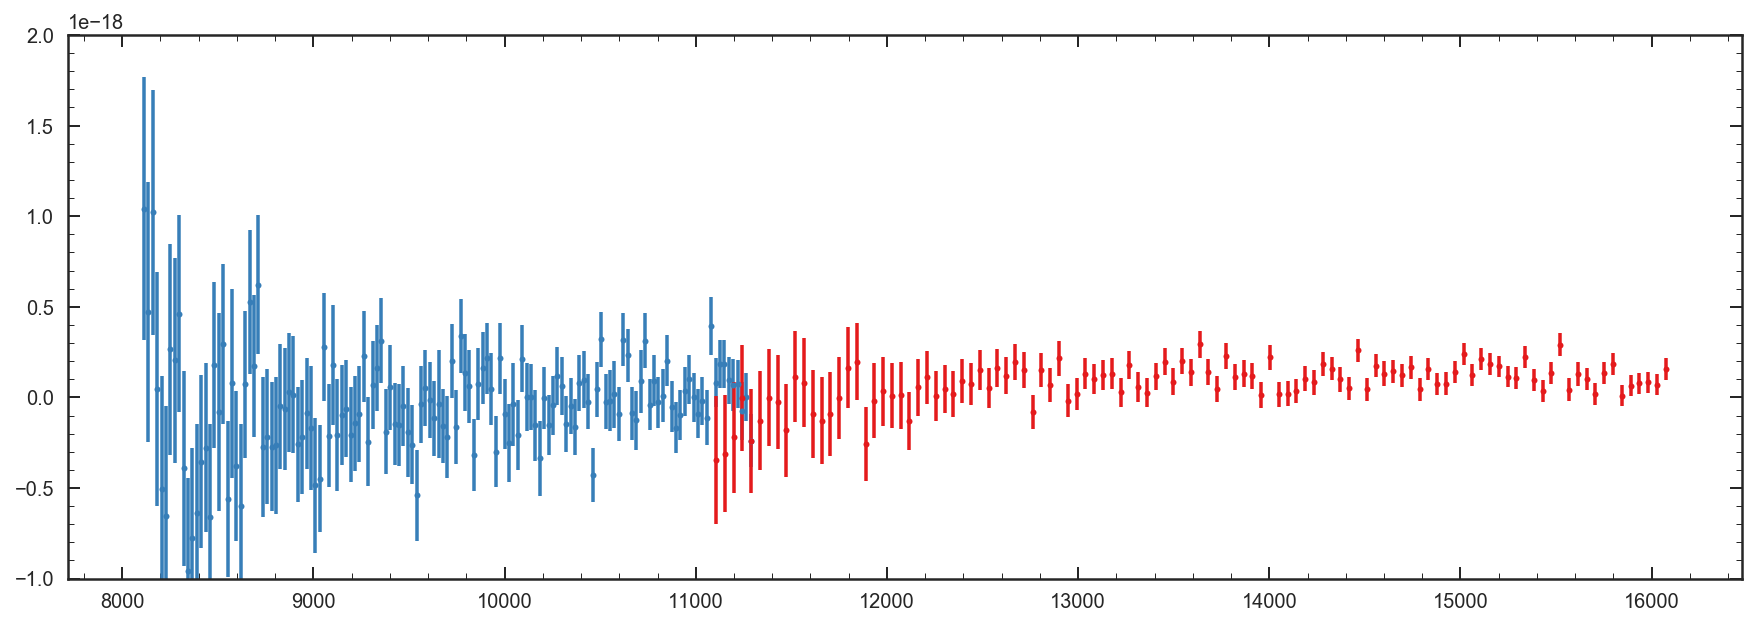

In [33]:
Bwv, Bflx, Berr, Bflt = np.load('../spec_files/GND_35175_g102.npy')
Rwv, Rflx, Rerr, Rflt = np.load('../spec_files/GND_35175_g141.npy')

IDB = [U for U in range(len(Bwv)) if 8100 < Bwv[U] < 11300]
IDR = [U for U in range(len(Rwv)) if 11100 < Rwv[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)
Bwv2, Bflx2, Berr2, Bflt2 = np.load('../spec_files/GND_35175_2_g102.npy')
Rwv2, Rflx2, Rerr2, Rflt2 = np.load('../spec_files/GND_35175_2_g141.npy')

IDB2 = [U for U in range(len(Bwv2)) if 8100 < Bwv2[U] < 11300]
IDR2 = [U for U in range(len(Rwv2)) if 11100 < Rwv2[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv2[IDB2],Bflx2[IDB2],Berr2[IDB2],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv2[IDR2],Rflx2[IDR2],Rerr2[IDR2],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)

In [34]:
Bstk,Bster = Stack(Bwv[Bflx2**2>0], [Bflx[Bflx2**2>0],Bflx2[Bflx2**2>0]],[Berr[Bflx2**2>0], Berr2[Bflx2**2>0] ])
Rstk,Rster = Stack(Rwv[Rflx2**2>0], [Rflx[Rflx2**2>0],Rflx2[Rflx2**2>0]],[Rerr[Rflx2**2>0], Rerr2[Rflx2**2>0] ])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [28]:
def Stack(wv,flgrid,errgrid):

    flgrid = np.transpose(flgrid)
    errgrid = np.transpose(errgrid)
    weigrid = errgrid ** (-2)
    infmask = np.isinf(weigrid)
    weigrid[infmask] = 0
    ################

    stack, err = np.zeros([2, len(wv)])
    for i in range(len(wv)):
        stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
        err[i] = 1 / np.sqrt(np.sum(weigrid[i]))
    
    return stack, err

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(-1e-18, 2e-18)

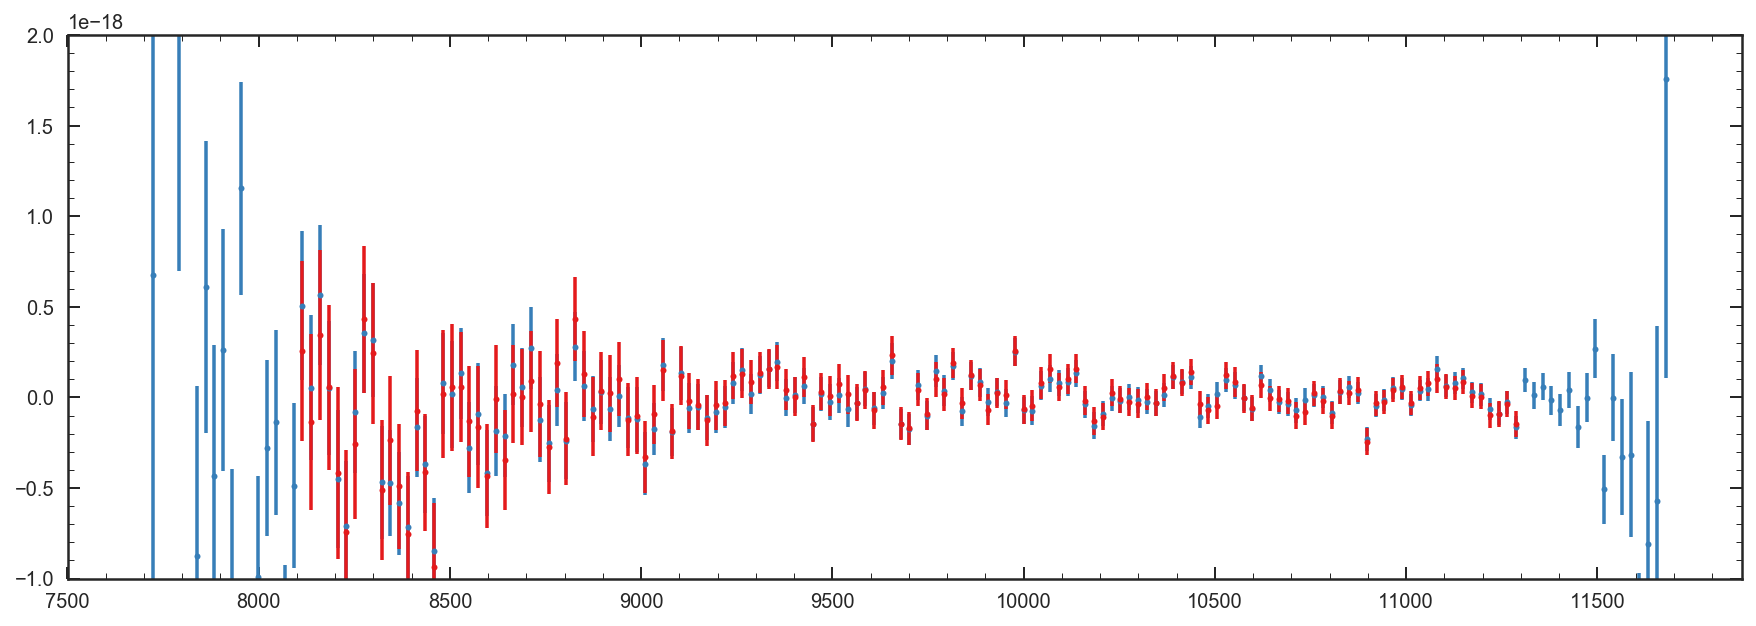

In [35]:
plt.figure(figsize=[15,5])
plt.errorbar(Bwv[Bflx2**2>0],Bstk,Bster,
            linestyle='None', marker='o', markersize=3, color='#377eb8')

plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)

(-1e-18, 1.5e-18)

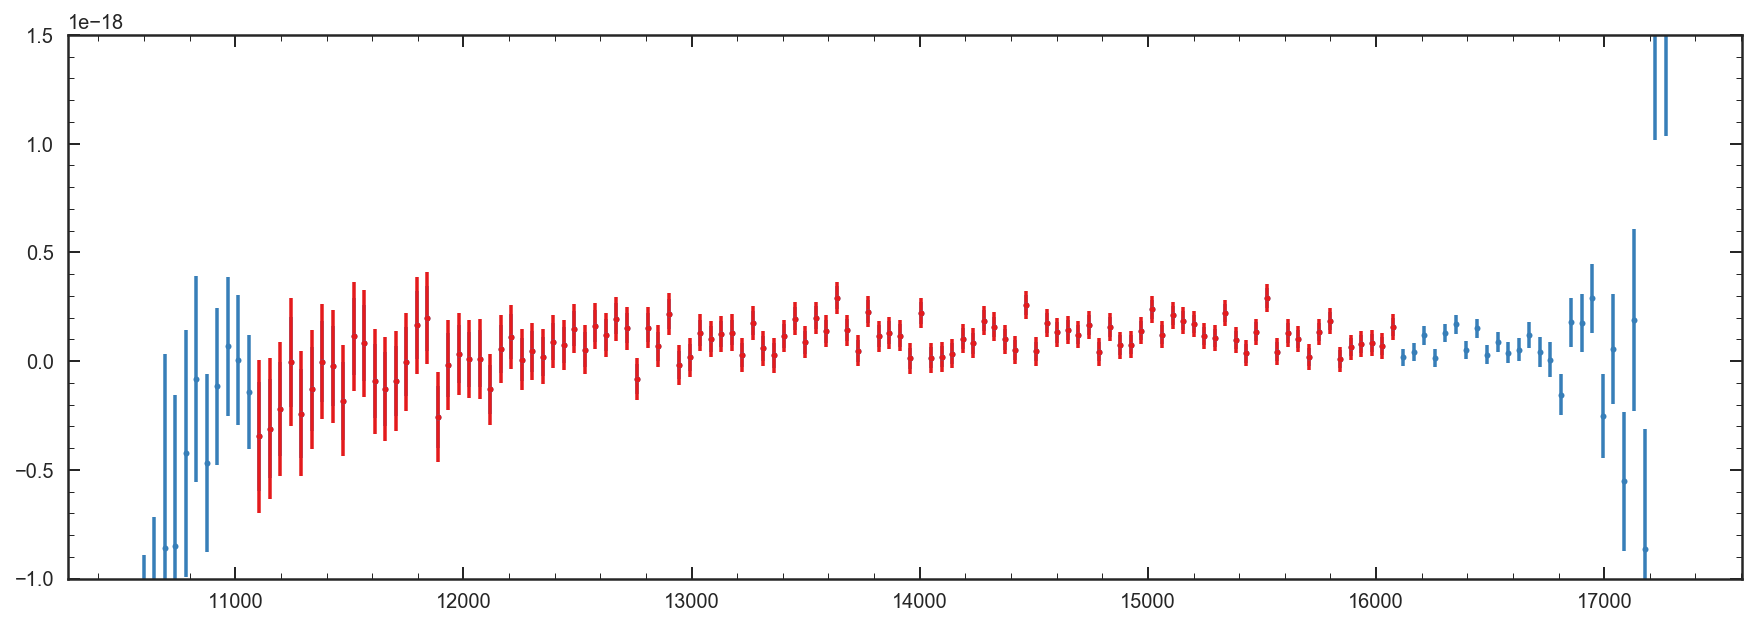

In [36]:
plt.figure(figsize=[15,5])
plt.errorbar(Rwv[Rflx2**2>0],Rstk,Rster,
            linestyle='None', marker='o', markersize=3, color='#377eb8')

plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,1.5E-18)

In [37]:
np.save('../spec_files/GND_35175_g102', [Bwv[Bflx2**2>0],Bstk,Bster, Bflt[Bflx2**2>0]])
np.save('../spec_files/GND_35175_g141', [Rwv[Rflx2**2>0],Rstk,Rster, Rflt[Rflx2**2>0]])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


# extract spec update

In [3]:
glob('/Volumes/Vince_CLEAR/RELEASE_v2.1.0/*N*/*35075*.1D.fits')

['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN3/GN3_35075.1D.fits']

In [8]:
def Extract_spec(field, galaxy):
    if field[1] == 'N':
        pre = 'N'
    else:
        pre = 'S'
    spec_list = glob('/Volumes/Vince_CLEAR/RELEASE_v2.1.0/*{0}*/*{1}*.1D.fits'.format(pre, galaxy))
    print(spec_list)
    Bwv, Bfl, Ber, Bft, Bln, Bct = [[],[],[],[],[],[]]

    Rwv, Rfl, Rer, Rft, Rln, Rct = [[],[],[],[],[],[]]

    for i in range(len(spec_list)):
        dat = fits.open(spec_list[i])

        try:
            Bwv.append(np.array(dat['G102'].data['wave']).T)
            Bfl.append(np.array(dat['G102'].data['flux']).T)
            Ber.append(np.array(dat['G102'].data['err']).T)
            Bft.append(np.array(dat['G102'].data['flat']).T)
            Bln.append(np.array(dat['G102'].data['line']).T)
            Bct.append(np.array(dat['G102'].data['cont']).T)

        except:
            print('no g102')

        try:
            Rwv.append(np.array(dat['G141'].data['wave']).T)
            Rfl.append(np.array(dat['G141'].data['flux']).T)
            Rer.append(np.array(dat['G141'].data['err']).T)
            Rft.append(np.array(dat['G141'].data['flat']).T)
            Rln.append(np.array(dat['G141'].data['line']).T)
            Rct.append(np.array(dat['G141'].data['cont']).T)

        except:
            print('no g141')

    if len(Bwv) > 0:                
        SBW, SBF, SBE, SBT, SBL, SBC = Stack(Bwv, Bfl, Ber, Bft, Bln, Bct)
        np.save('../spec_files/{0}_{1}_g102'.format(field, galaxy),[SBW, SBF, SBE, SBT, SBL, SBC])


    if len(Rwv) > 0:     
        SRW, SRF, SRE, SRT, SRL, SRC = Stack(Rwv, Rfl, Rer, Rft, Rln, Rct)
        np.save('../spec_files/{0}_{1}_g141'.format(field, galaxy),[SRW, SRF, SRE, SRT, SRL, SRC])



In [10]:
Cids = pd.read_pickle('../dataframes/galaxy_frames/GN_new.pkl')

In [11]:
for i in Cids.id.values:
#     print(i)
    Extract_spec('GND', i)

['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN7/GN7_11245.1D.fits']
no g141
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_11814.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_12481.1D.fits']


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/Vince.ec/GitHub/Cluster_and_fiel

no g141
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_12543.1D.fits']
no g141
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_12617.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_12739.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_13718.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_13855.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_13977.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_14132.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_14140.1D.fits']
no g141
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_14970.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_15616.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_15981.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_16180.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN2/GN2_16231.1D.fits']
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN7/GN7_17735.1D.fits']
no g141
['/Volumes/Vince_CLEAR/RELEASE_v2.1.0/GN7/GN7_17746.1D.fits']
no g141
['/Volumes/Vince_CLEAR/RELEASE

In [5]:
Cids

array([35075, 35204, 28379, 32719, 32719, 30204, 20801, 11839, 17927,
       17324, 13777, 14281, 19235, 13197, 19659, 14850, 17293, 18197,
       21231, 10639, 12674, 21290, 17579, 19591, 21707, 24427, 22547,
       24221, 37395, 37893, 30053, 31400], dtype=int32)

In [2]:
field = 'GSD'
Cids = [45068]

gsd_fields = ['GS3', 'GS2']

for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob('/Volumes/Vince_CLEAR/Data/Grism_fields/{0}/*GrismFLT.fits'.format(gsd_fields[i])))
    for ii in Cids:
        try:
            ex = Extract_all(ii, 'GSD', grp)
            ex.Extract_BeamCutout()
        except:
            print(ii)

Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj11hiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj11hwq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj11hpq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj11i3q.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj29ncq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj29nkq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj29nsq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj29nzq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj33tiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj33tpq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj33twq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/ibhj33u3q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt30s0q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt30s2q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt30s5q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt30s7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt31r1q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt31r3q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt31r6q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt31r8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS3/icxt32nlq.01.GrismFLT.fits!
Load /Volume

Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj11hiq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj11hpq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj11hwq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj11i3q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj35vuq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj35w1q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj35w8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/ibhj35wfq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/icxt01cgq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/icxt01ciq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/icxt01clq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/icxt01cnq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/icxt02c7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/GS2/icxt02caq.01.GrismFLT.fits!
Load /Volume

In [3]:
ex = Extract_all(ii, 'GSD', grp)

In [5]:
ex.Extract_BeamCutout()

TypeError: write_fits() got an unexpected keyword argument 'clobber'